# Neural Style Transfer
Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.
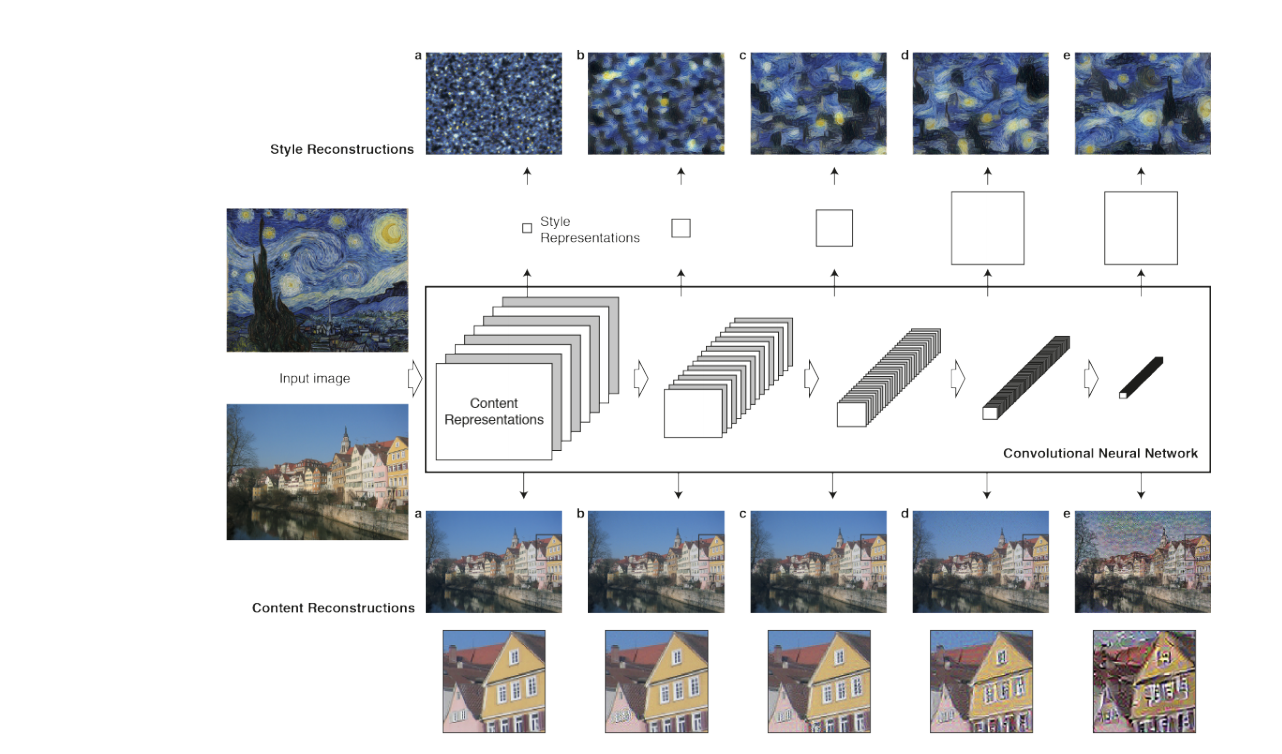


**Reproducing Content**
Suppose we have a target image and we want to pass it through a neural network and it activates some neurons at the final layer of the CNN. Suppose we could generate an image precisely like the original. Then logically it should activate the same exact neurons in the CNN with the exact same output. We first take the square difference between the activation from our original image and from our generated image, then we average all those square differences together. **But why do we pass X and X' to a neural network if we just wanted to recreate our original image?**
A neural network is able to capture features of an image. Each successive layer of a CNN forgets details about the original image and focuses more on features. By doing this we create a balance between content and syle by saying take the most important features of the content but only the most important features. 

(Content in a simple way of asking does this thing look like the other thing?)

**Reproducing Style**
We have two images. One image has the style we want to copy, the other image is our image that we want to optimize wrt. the style loss. In order to do this we pass both images to the pretrained VGG-CNN and before comparing the two images we transfrom the outputs into Gram matrices. From  these matrices we can calculate the Mean Squared error. 
(Gram matrix : A matrix product of its input multiplied by its transpose divided by the number of elements.)


Gram matrix looks similar to autocorrelation, where it means the correlation(how related one thing to another)  between a thing and itself. 

When calculating the style loss we can take the gram matrix from 5 different places on the VGG network and then sum the weighted mean square errors together. The image we get from the different layers of a network represents the image in different scales. Therefore by doing this, it allows us to capture patterns of different sizes. 


# Final Step
To get the content loss we pass the content image through a pre-trained CNN like VGG. We pass our image through the same CNN. We take the mean squared error between these two outputs. 
To get the style loss we pass the style image through the same CNN. We take the output at 5 different locations and calculatethe gram matrix and we do the same thing to our image. We take the MSE error between the gram matrices of the style image and our image. Then we take the weighted sum of these MSE errors. This gives us the style loss. Finally we add these two losses together to get the final loss.


In [51]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [53]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [54]:
# Image Preprocessing
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

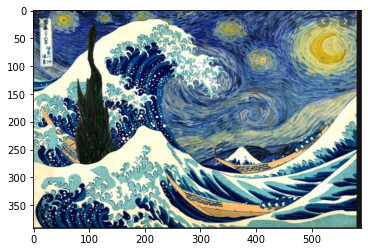

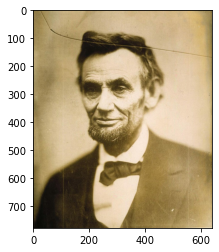

In [59]:
content_image = load_image('images/abraham.jpg')
style_image = load_image('images/style.png')

plt.imshow(np.squeeze(style_image))
plt.show()


plt.imshow(np.squeeze(content_image))
plt.show()

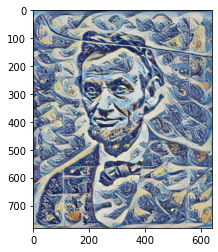

In [47]:
#Visualize
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

plt.imshow(np.squeeze(stylized_image))
plt.show()